## Principle component analysis - przykład

**Principal Component Analysis (PCA)** to metoda analizy statystycznej używana głównie do redukcji wymiarów danych i odkrywania najważniejszych cech w dużych zbiorach danych. Pozwala uprościć dane, zachowując jednocześnie jak najwięcej informacji. Poniżej znajdziesz szczegółowe wyjaśnienie.

Cechy PCA:
- Redukcja wymiarowości: Usunięcie mniej istotnych informacji, aby dane były łatwiejsze do analizy i wizualizacji.
- Eliminacja redundancji: Zmniejszenie korelacji między cechami.
- Zachowanie informacji: Zminimalizowanie utraty istotnych danych.

### **Przykład:** analiza danych o klientach sklepu internetowego. Załóżmy, że mamy dane o klientach, które zawierają takie cechy, jak:
1. Wiek
2. Średnia wartość zakupu
3. Liczba transakcji w ciągu roku
4. Liczba odwiedzin na stronie
5. Ocena zadowolenia klienta (od 1 do 10)
6. Celem jest uproszczenie tych danych i wizualizacja ich na wykresie 2D, aby lepiej zrozumieć grupy klientów.

1. Przygotowanie danych: 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
#przykładowe dane
data = {
    'Wiek': [25, 34, 23, 45, 50, 38, 29, 60, 35, 42],
    'Średnia wartość zakupu': [100, 200, 150, 300, 250, 120, 180, 400, 220, 130],
    'Liczba transakcji': [5, 7, 6, 8, 5, 6, 7, 8, 6, 5],
    'Liczba odwiedzin': [20, 30, 25, 35, 30, 28, 33, 40, 35, 25],
    'Ocena zadowolenia': [8, 9, 7, 8, 6, 7, 9, 10, 8, 7]
}

df = pd.DataFrame(data)
df.head()

,Wiek,Średnia wartość zakupu,Liczba transakcji,Liczba odwiedzin,Ocena zadowolenia
0,25,100,5,20,8
1,34,200,7,30,9
2,23,150,6,25,7
3,45,300,8,35,8
4,50,250,5,30,6


2. Normalizacja danych

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [33]:
type(scaled_data)

numpy.ndarray

3. Zastosowanie PCA

In [38]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-2.477415,-0.813820
1,0.474674,-1.093427
2,-1.715968,-0.512550
3,1.972348,0.110938
4,-0.507684,2.299569


4. Wizualizacja wyników

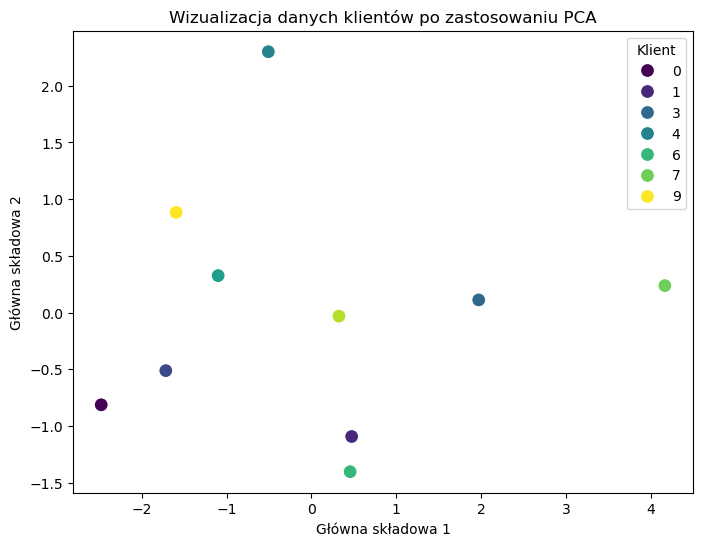

In [41]:
# Dodanie etykiet do wynikowego DataFrame
pca_df['Klient'] = df.index

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Klient', palette='viridis', s=100)
plt.title('Wizualizacja danych klientów po zastosowaniu PCA')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.legend(title='Klient')
plt.show()